# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [2]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt

# For Data Visualization
import cv2
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import Adam # Optimizers for optimizing the model
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
hf = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

Check the number of images in the training and the testing dataset.

In [5]:
X_train = hf['X_train']
Y_train = hf['y_train']
X_test = hf['X_test']
print('# Images for Training :',X_train.shape[0])
print('# Images for testing :',X_test.shape[0])

# Images for Training : 42000
# Images for testing : 18000


**Observation:**
There are 42,000 images for training dataset and 18,000 images for testing.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

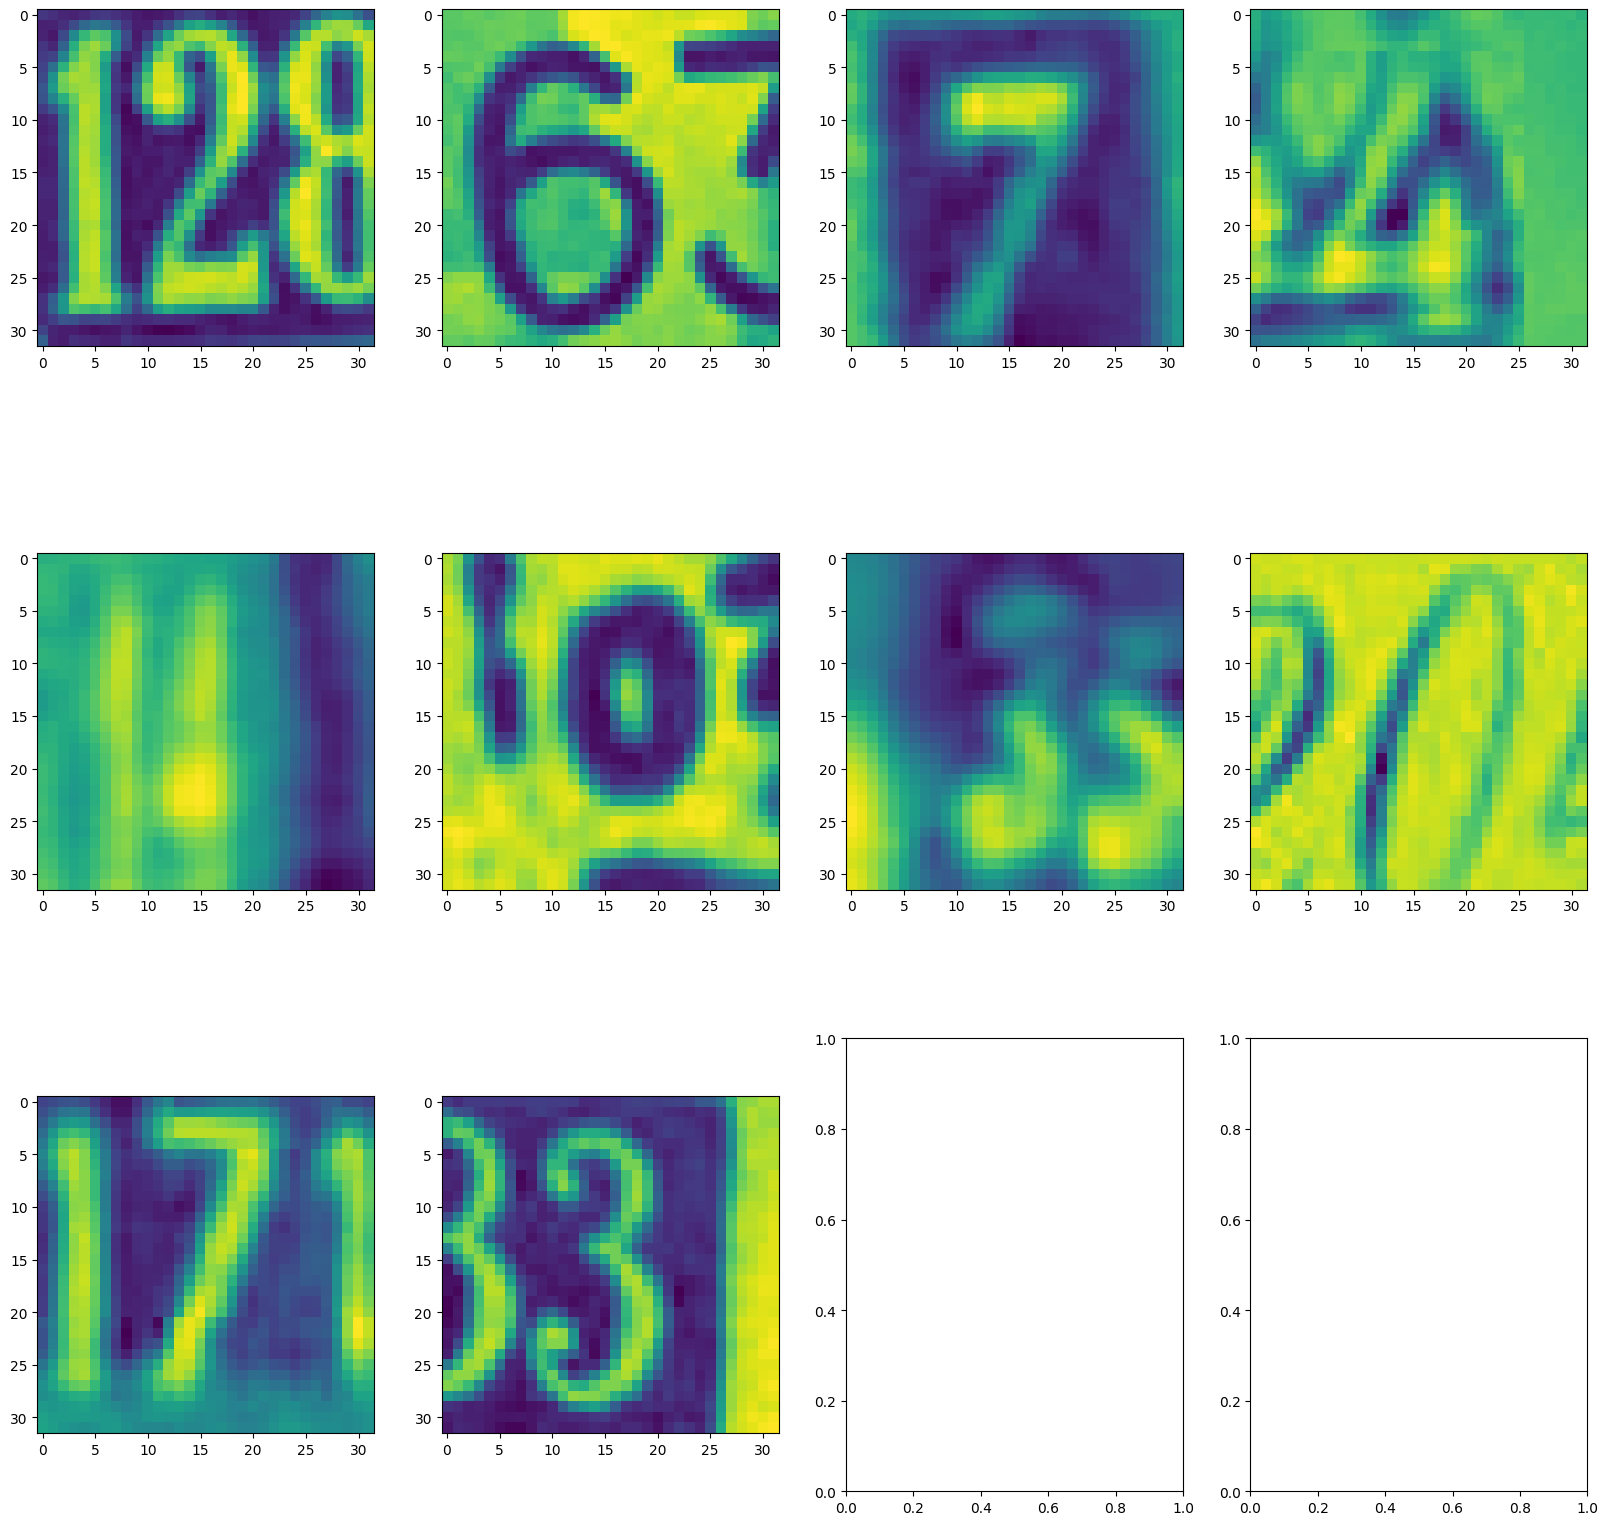

In [6]:
plt.subplots(3,4,figsize = (20,20))

for i in range(10):
    img_np = X_train[i]
    plt.subplot(3,4,1+i)
    plt.imshow(img_np)
plt.show()

In [7]:
for i in range(10):
  print(Y_train[i])

2
6
7
4
4
0
3
0
7
3


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [8]:
print(np.array(X_train[1]).shape)
print(np.array(X_train[1]))

(32, 32)
[[86.9591 87.0685 88.3735 ... 91.8014 89.7477 92.5302]
 [86.688  86.9114 87.4337 ... 90.7306 87.204  88.5629]
 [85.9654 85.8145 85.9239 ... 63.8626 59.8199 54.8805]
 ...
 [90.2236 91.0448 93.4637 ... 55.3535 48.5822 44.0557]
 [90.6427 90.4039 90.937  ... 78.2696 77.4977 74.27  ]
 [88.0236 88.1977 86.6709 ... 75.2206 76.6396 79.2865]]


### **Normalize the train and the test data**

In [9]:
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
print('X_train:',X_train.shape)

X_train: (42000, 1024)


In [10]:
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print('X_test:',X_test.shape)

X_test: (18000, 1024)


Print the shapes of Training and Test data

In [11]:
X_train = X_train/255
X_test = X_test/255
print(X_train.shape)
print(X_test.shape)
print(X_train[1])
print(X_test[1])

(42000, 1024)
(18000, 1024)
[0.34101608 0.3414451  0.34656274 ... 0.29498273 0.30054745 0.31092745]
[0.45161137 0.44769022 0.44376904 ... 0.1652502  0.18922432 0.20883021]


### **One-hot encode output**

In [12]:
Y_train_encoded = to_categorical(Y_train,10)
print(Y_train_encoded)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
hf.keys()
Y_test = hf['y_test']
Y_test_encoded = to_categorical(Y_test,10)
print(Y_test_encoded)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**The test target dataset is one hot encoded for evaluating the accuracy of our ANN models using the test data.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [14]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [15]:
from keras.backend import categorical_crossentropy
model_1 = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(1024,), name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(10, activation="softmax", name="layer3"),
    ]
)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_1.compile(loss=categorical_crossentropy, optimizer=opt, metrics="accuracy")

ann_models = []
ann_models.append(model_1)

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                65600     
                                                                 
 layer2 (Dense)              (None, 32)                2080      
                                                                 
 layer3 (Dense)              (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model_1.fit(X_train, Y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Epoch 1/20
263/263 [==============================] - 6s 14ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 4s 16ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 4s 15ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 3s 12ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 3s 10ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 3s 10ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 3s 12ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013

### **Plot the Training and Validation Accuracies and write down your Observations.**

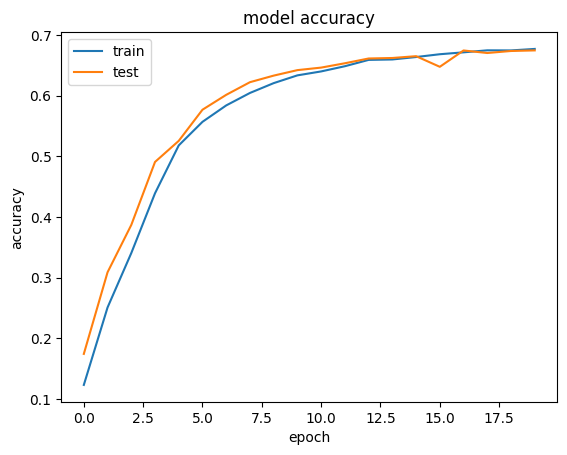

In [17]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations:**
The accuracy 0r 67% is less on the current model due to less number of layers/number of neurons to process this and the gradient descent may be trying to converge at some local minima without effectively minimizing the cost function.The model seems to be generelizing well with the validation dataset.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [18]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [19]:
from keras.backend import categorical_crossentropy
model_2 = keras.Sequential(
    [
        Dense(256, activation="relu", input_shape=(1024,), name="layer1"),
        Dense(128, activation="relu", name="layer2"),
        Dropout(0.2, name="dropout_layer3"),
        Dense(64, activation="relu", name="layer4"),
        Dense(64, activation="relu", name="layer5"),
        Dense(32, activation="relu", name="layer6"),
        BatchNormalization(),
        Dense(10, activation="softmax", name="layer7"),
    ]
)
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model_2.compile(loss=categorical_crossentropy, optimizer=opt, metrics="accuracy")

ann_models = []
ann_models.append(model_2)

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 256)               262400    
                                                                 
 layer2 (Dense)              (None, 128)               32896     
                                                                 
 dropout_layer3 (Dropout)    (None, 128)               0         
                                                                 
 layer4 (Dense)              (None, 64)                8256      
                                                                 
 layer5 (Dense)              (None, 64)                4160      
                                                                 
 layer6 (Dense)              (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [20]:
history = model_2.fit(X_train, Y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 [==============================] - 5s 13ms/step - loss: 2.3301 - accuracy: 0.1020 - val_loss: 2.3126 - val_accuracy: 0.0969
Epoch 2/30
263/263 [==============================] - 4s 14ms/step - loss: 2.3040 - accuracy: 0.1043 - val_loss: 2.3018 - val_accuracy: 0.1049
Epoch 3/30
263/263 [==============================] - 5s 19ms/step - loss: 2.1035 - accuracy: 0.2029 - val_loss: 1.9555 - val_accuracy: 0.2789
Epoch 4/30
263/263 [==============================] - 3s 13ms/step - loss: 1.6221 - accuracy: 0.4240 - val_loss: 1.5954 - val_accuracy: 0.4607
Epoch 5/30
263/263 [==============================] - 3s 12ms/step - loss: 1.3656 - accuracy: 0.5424 - val_loss: 1.2720 - val_accuracy: 0.5899
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.1958 - accuracy: 0.6150 - val_loss: 1.1094 - val_accuracy: 0.6462
Epoch 7/30
263/263 [==============================] - 5s 17ms/step - loss: 1.1250 - accuracy: 0.6400 - val_loss: 1.0664 - val_accuracy: 0.6543

### **Plot the Training and Validation Accuracies and write down your Observations.**

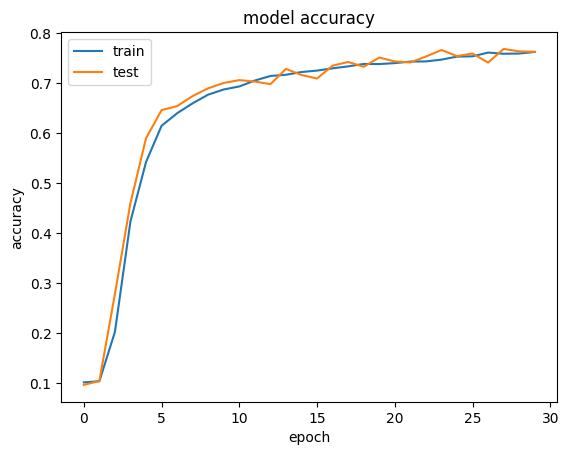

In [21]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations:**The above model has better accuracy 76% and is found to be generalizing well with the test data.The addition of more dense layers and nuerons has been effective in reducing the cost and the dropout has resulted in less overfitting.The model accuracy could still be improved by adding convolutional layers.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [22]:
model_2.evaluate(X_test, (Y_test_encoded))

563/563 [==============================] - 2s 4ms/step - loss: 0.7689 - accuracy: 0.7596


[0.768884003162384, 0.7596111297607422]

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

563/563 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1814
           1       0.74      0.79      0.77      1828
           2       0.77      0.80      0.79      1803
           3       0.62      0.77      0.69      1719
           4       0.79      0.83      0.81      1812
           5       0.76      0.68      0.72      1768
           6       0.80      0.74      0.77      1832
           7       0.83      0.77      0.80      1808
           8       0.72      0.72      0.72      1812
           9       0.75      0.74      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



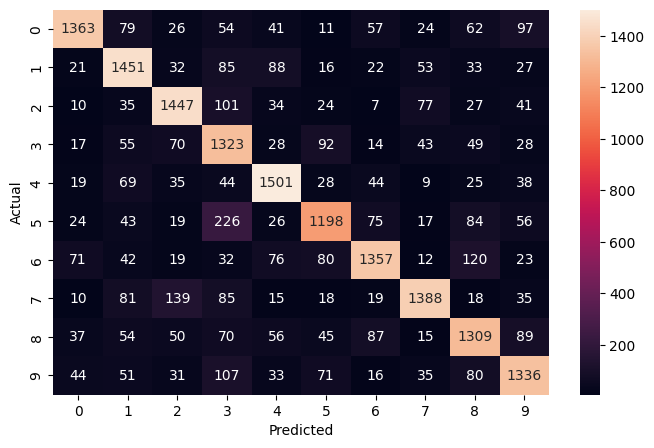

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_2.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(Y_test_encoded, axis = 1)

#Printing the classification report
print(classification_report(y_true, pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:**
The model has a reasonably good accuracy of 76%,but this may be improved.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [24]:
X_train = hf['X_train']
Y_train = hf['y_train']
X_test = hf['X_test']
Y_test = hf['y_test']
print('X_train :',X_train.shape)
print('X_test:',X_test.shape)

X_train : (42000, 32, 32)
X_test: (18000, 32, 32)


Check the number of images in the training and the testing dataset.

In [25]:
print('No. of training images :', np.array(X_train.shape[0]))
print('No. of testing images :', np.array(X_test.shape[0]))

No. of training images : 42000
No. of testing images : 18000


**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [26]:
X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape)
print(X_train[1].shape)



(42000, 32, 32)
(32, 32)


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [27]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print('X_train :',X_train.shape)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print('X_test :',X_test.shape)

X_train : (42000, 32, 32, 1)
X_test : (18000, 32, 32, 1)


Normalize inputs from 0-255 to 0-1

In [28]:
X_train = X_train/255
X_test = X_test/255

Print New shape of Training and Test

In [29]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X_train : (42000, 32, 32, 1)
X_test : (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [30]:
Y_train_encoded = to_categorical(Y_train,10)
print('Y_train_encoded :',Y_train_encoded)
Y_test_encoded = to_categorical(Y_test,10)
print('Y_test_encoded :',Y_test_encoded)

Y_train_encoded : [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y_test_encoded : [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**We have one hot encoded our training and test target variables.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [31]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [32]:
cnn_model_1 = Sequential([
    Conv2D(filters=16,kernel_size=(3,3), padding='same', input_shape = (32, 32, 1)),
    LeakyReLU(0.1),
    Conv2D(filters=32,kernel_size=(3,3), padding='same'),
    LeakyReLU(0.1),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(32),
    LeakyReLU(0.1),
    Dense(10, activation='softmax'),
])

opt = Adam(learning_rate = 0.001)

cnn_model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')

cnn_models = []
cnn_models.append(cnn_model_1)

cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

### **Plot the Training and Validation Accuracies and Write your observations.**

In [33]:
history = cnn_model_1.fit(X_train,Y_train_encoded, validation_split=0.2, batch_size = 32, verbose = 1, epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 102s 96ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 97s 92ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 99s 95ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 96s 92ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 104s 99ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 102s 98ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.450

**Observations:**The model has very good accuracy of 97% on the training dataset and 87% accuracy on the validation dataset which suggests that the model has done some overfitting on the training dataset after epoch=4 We
can see that the validation accuracy remains flat at 87% while the training data accuracy kept increasing to 97%.The model has overfitted and needs to generalize well with the validation dataset.

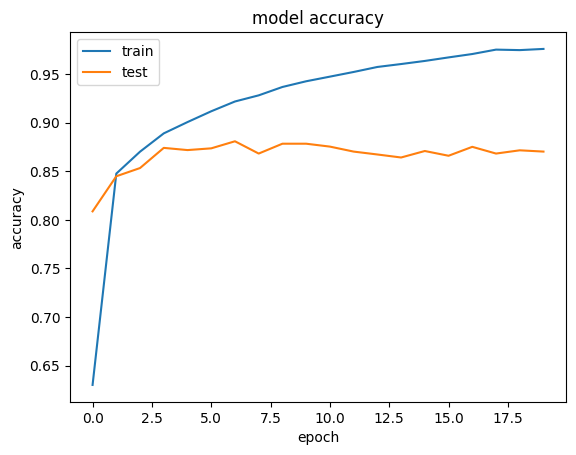

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [35]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [36]:
cnn_model_2 = Sequential([
    Conv2D(filters=16,kernel_size=(3,3), padding='same', input_shape = (32, 32, 1)),
    LeakyReLU(0.1),
    Conv2D(filters=32,kernel_size=(3,3), padding='same'),
    LeakyReLU(0.1),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Flatten(),
    Dense(32),
    LeakyReLU(0.1),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

opt = Adam(learning_rate = 0.001)

cnn_model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')

cnn_models = []
cnn_models.append(cnn_model_2)

cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

### **Plot the Training and Validation accuracies and write your observations.**

In [37]:
history = cnn_model_2.fit(X_train,Y_train_encoded, validation_split=0.2, batch_size = 128, verbose = 1, epochs = 30)

Epoch 1/30
263/263 [==============================] - 92s 345ms/step - loss: 1.6020 - accuracy: 0.4387 - val_loss: 2.0513 - val_accuracy: 0.5652
Epoch 2/30
263/263 [==============================] - 96s 365ms/step - loss: 0.8775 - accuracy: 0.7235 - val_loss: 1.0160 - val_accuracy: 0.8011
Epoch 3/30
263/263 [==============================] - 107s 407ms/step - loss: 0.7553 - accuracy: 0.7612 - val_loss: 0.5601 - val_accuracy: 0.8310
Epoch 4/30
263/263 [==============================] - 92s 348ms/step - loss: 0.6896 - accuracy: 0.7830 - val_loss: 0.7056 - val_accuracy: 0.7917
Epoch 5/30
263/263 [==============================] - 89s 337ms/step - loss: 0.6532 - accuracy: 0.7948 - val_loss: 0.5111 - val_accuracy: 0.8469
Epoch 6/30
263/263 [==============================] - 90s 342ms/step - loss: 0.6179 - accuracy: 0.8085 - val_loss: 0.5091 - val_accuracy: 0.8512
Epoch 7/30
263/263 [==============================] - 91s 345ms/step - loss: 0.5922 - accuracy: 0.8151 - val_loss: 0.5002 - val_a

**Observations:**The last model gives very good accuracy of 88% on the training dataset and gives 86% accuracy on the validation dataset.The model seems to be generalizing well with both training and test data.The addition of dropout layer may have helped in preventing the model from overfitting to the training dataset and the addition of multiple convolution layers and batch normalization have helped to get a better generalized model with good accuracy.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [38]:
cnn_model_2.evaluate(X_test, Y_test_encoded)

563/563 [==============================] - 13s 24ms/step - loss: 0.6470 - accuracy: 0.8570


[0.6470275521278381, 0.8569999933242798]

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

563/563 [==============================] - 15s 27ms/step
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1814
           1       0.92      0.83      0.88      1828
           2       0.94      0.84      0.89      1803
           3       0.87      0.71      0.78      1719
           4       0.92      0.88      0.90      1812
           5       0.79      0.90      0.84      1768
           6       0.82      0.87      0.85      1832
           7       0.88      0.91      0.89      1808
           8       0.80      0.82      0.81      1812
           9       0.82      0.87      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



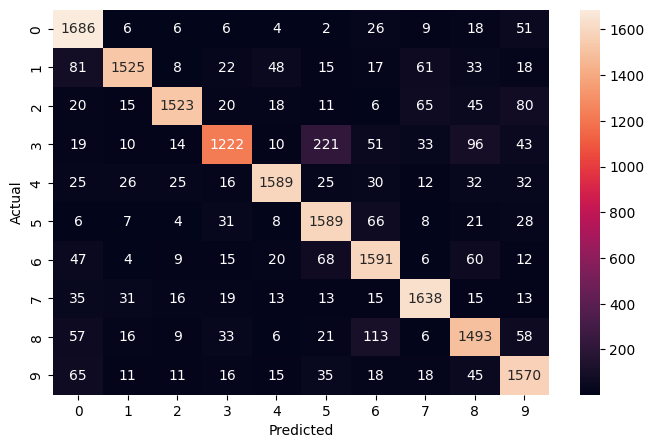

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = cnn_model_2.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(Y_test_encoded, axis = 1)

#Printing the classification report
print(classification_report(y_true, pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Write your final observations on the performance of the model on the test data.**

In [40]:
cnn_model_2.evaluate(X_test, Y_test_encoded)

563/563 [==============================] - 14s 24ms/step - loss: 0.6470 - accuracy: 0.8570


[0.6470275521278381, 0.8569999933242798]

**Final Observations:**The model gave an accuracy of 88% on training dataset,86% on validation dataset and we got similar 86% accuracy on the test dataset as well.This points that the model is not overfitting and has generelized well with the test dataset.This is the best model out of all the previous ones.